
# Proyecto
### Clasificación de radiografias de torax con o sin neumonía.
## Por:

*   Cuevas Garcia Ana Cristina
*   Medrano Flores Zahid


# Planteamiento del problema


##*¿Qué es la Neumonía?*



La neumonía es una infección que inflama los sacos aéreos de uno o ambos pulmones. Estos sacos pueden llenarse de líquido o pus, lo que provoca síntomas como tos con flema, fiebre, escalofríos y dificultad para respirar. La neumonía puede ser causada por diversos microorganismos, incluyendo bacterias, virus y hongos.

###*Detonantes de la neumonía*
Los principales detonantes de la neumonía son:

* **Bacterias**: La más común es el Streptococcus
pneumoniae.
* **Virus**: Como el de la gripe (influenza) y el virus sincitial respiratorio (VSR).
* **Hongos**: Menos comunes, pero pueden afectar a personas con sistemas inmunitarios debilitados

###*Personas más vulnerables*
Algunas personas son más susceptibles a contraer neumonía debido a varios factores:

* **Niños menores de 5 años**: Su sistema inmunológico aún está en desarrollo.
* **Adultos mayores de 65 años**: El sistema inmunológico se debilita con la edad.
* **Personas con enfermedades crónicas**: Como asma, diabetes, enfermedades cardíacas, enfermedad pulmonar obstructiva crónica (EPOC) o cáncer.
* **Personas inmunocomprometidas**: Aquellos con VIH, en tratamiento con quimioterapia o que toman medicamentos inmunosupresores.
* **Fumadores**: El tabaquismo daña las defensas naturales del sistema respiratorio.

# Objetivo del proyecto

Puesto que casi 2000 niños mueren diariamente en el mundo por culpa de la neumonía, la principal causa de muerte en niños menores de cinco años y la principal causa de hospitalización de adultos en Estados Unidos, con más de un millón de ingresos al año; unos 40 000 estadounidenses mueren anualmente por esta enfermedad.
El propósito del proyecto es poder identificar la presencia de neumonía, dado que existen varios tipos de la misma (nos encantaría implementar en el futuro, que el modelo nos pueda ayudar a decirnos el tipo de neumonía, de momento solo nos dirá si la padecemos o no) y puede ser peligrosa para un porcentae grande de personas.
como objetivo principal es dar un **Diagnóstico temprano y preciso**:
* *Reducción de errores humanos*: Los radiólogos pueden pasar por alto signos sutiles de neumonía, especialmente en etapas tempranas. Un modelo de IA puede ayudar a identificar estos signos con mayor precisión.
* *Detección rápida*: La IA puede analizar radiografías en segundos, lo que permite un diagnóstico más rápido y, por ende, un tratamiento más oportuno.

Ademas de ser un **Apoyo a profesionales de la salud**:

* *Una segunda opinión*: Los modelos de IA pueden servir como una segunda opinión para los médicos, ayudándoles a confirmar sus diagnósticos.
* *Capacitación y educación*: Los modelos pueden ser utilizados como herramientas educativas para entrenar a nuevos radiólogos.

Sabemos que el **acceso en áreas remotas** puede ser crucial para la salud en ciertas localidades:

* *Telemedicina*: En regiones con escasez de especialistas, un modelo de IA puede ser utilizado para analizar radiografías enviadas digitalmente, facilitando el acceso a diagnósticos precisos en áreas rurales o desatendidas.

Podemos crear una **eficiencia en el sistema de salud**:
* *Optimización de recursos*: Al automatizar parte del proceso de diagnóstico, se pueden liberar recursos humanos para casos más complejos.
* *Reducción de costos*: Un diagnóstico más rápido y preciso puede reducir los costos asociados con tratamientos tardíos o incorrectos.

Y claramente un mantenimiento de éste modelo puede ser clave para tratar esta enfermedad.

# ¿Cómo lo haremos?

Usaremos una base de datos en *Kaggle*, que recopila imágenes de radiografías de tórax, etiquetadas en 2 categorías:

* Normal (muestra pulmones limpios, visíbles)

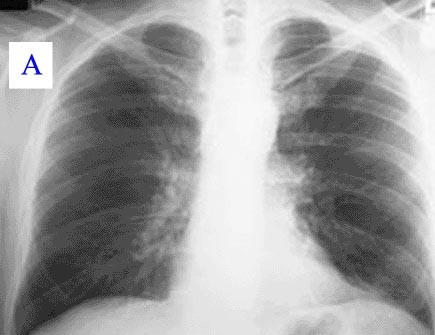

* Pneumonía (Podemos apreciar blancuzca la zona, no podemos ver los dos pulmones en su totalidad)

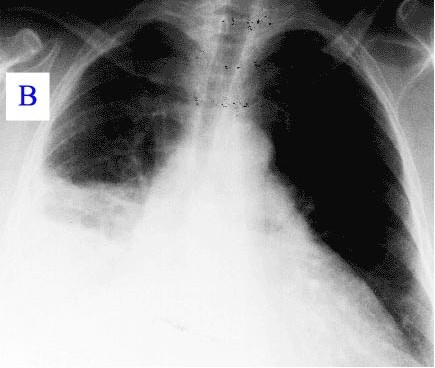

Este dataset se encuentra en el siguiente link:
https://www.kaggle.com/datasets/tolgadincer/labeled-chest-xray-images

pequeño aviso: se nos proporcionó el link: https://www.kaggle.com/code/hridita45/chest-x-ray-pneumonia-cnn-transfer-learning/notebook
pero ésta persona usó el dataset que he puesto antes, sin más que aclarar, continuamos.

el cual contiene 5,856 imagenes de radiografías de torax, Las imágenes están etiquetadas como (enfermedad:NORMAL/BACTERIA/VIRUS)-(ID aleatoria del paciente)-(número de imagen de un paciente). y las imágenes se dividen en un conjunto de entrenamiento y un conjunto de prueba de pacientes independientes.

# Preprocesamiento de datos

### Creamos la conexión con Github




In [1]:
#descargar wget y os
!pip install wget
!pip install gitpython

In [2]:
import os
from git import Repo

#para poder acceder a las imágenes, hacemos uso de la librería git, que nos ayuda a clonar el repositorio que tenemos en github
#y después acceder a cada una de las carpetas con las imágenes
#La librería os nos permite cargar las imágenes y poder verlas en el colab

#colocamos primero la url del repositorio y despues la dirección del repositorio
repo_url = "https://github.com/zamef/ProyectoTSFC"
repo_dir = "/content/ProyectoTSFC"

#clonar el repositorio tomando el url y la dirección
if not os.path.exists(repo_dir):
    Repo.clone_from(repo_url, repo_dir)

#Encontrar el directorio exacto donde están las imágenes
base_dir = os.path.join(repo_dir, "dataset")

### Gráfica de distribución

Vamos a observar la cantidad de datos que tenemos por categoría para darnos una idea de la calidad de los datos con los que vamos a trabajar, y notar si existe algún desvalance

In [3]:
!pip install matplotlib seaborn pandas

In [4]:
#Aquí pondremos las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

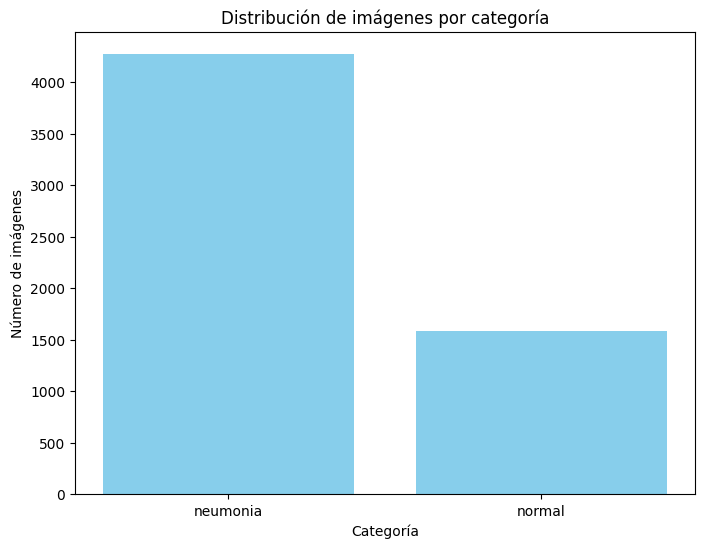

In [5]:
import os
import matplotlib.pyplot as plt

#directorio donde esttán las imágenes
base_dir = "/content/ProyectoTSFC/dataset"

#creamos una lista que nos permitirá ver la cantidad de imágenes por cada categoría
num_images_per_category = []

#Obtenemos la cantidad de impagenes que hay en cada una de las categorías, las cuales están como folders y vamos iterando para ver la cantidad por folder
folders = ["neumonia", "normal"]
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    num_images = len(os.listdir(folder_path))
    num_images_per_category.append(num_images)

#Etiquetas para las categorías, las cuales son las 4 que ya se mencionaron
labels = ["neumonia", "normal"]

#gráfica de distribución para ver la cantidad
plt.figure(figsize=(8, 6))
plt.bar(labels, num_images_per_category, color='skyblue')
plt.xlabel('Categoría')
plt.ylabel('Número de imágenes')
plt.title('Distribución de imágenes por categoría')
plt.show()

### ¿Con cuantas imagenes contamos?

In [6]:
#Por último, veremos de manera textual la cantidad de datos que se tienen por categoría para poder hacernos una idea si están balanceadas o desbalanceadas
#pequeño spoiler, no están nada balanceadas
folders = ["neumonia", "normal"]
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    num_images = len(os.listdir(folder_path))
    print(f"Número de imágenes en '{folder}':", num_images)

Número de imágenes en 'neumonia': 4273
Número de imágenes en 'normal': 1583


### ¡Las imagenes estan desbalanceadas!

Hemos notado que tenemos un desbalance, dado que tenemos muchas más imagenes de radiografias de torax con neumonia, que normales.
podemos optar por una división estratificada.

### Tamaño de las imagenes

El tamaño de todas las imagenes es distinto y podemos graficar este tamaño para hacernos una idea.

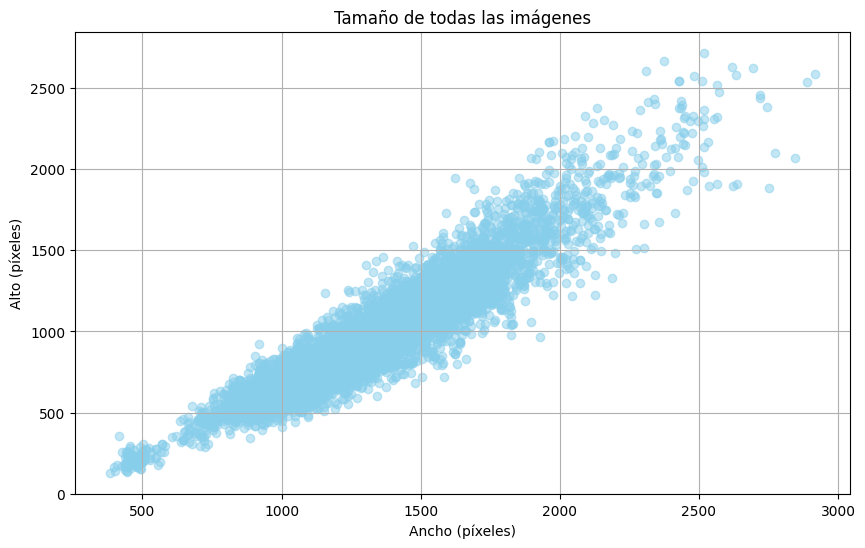

In [7]:
#COMPROBAREMOS EL TAMAÑO DE LAS IMÁGENES
from PIL import Image
import os

#Volvemos a cargar el directorio donde se encuentran las imágenes, está será la última vez que comentemos esto, de ahora en más cada que se use en el código
#ya no lo vamos a mencionar
base_dir = "/content/ProyectoTSFC/dataset"

#Creamos una lista donde se va a estar almacenando el tamaño de las imágenes, es decir, largo y ancho
image_sizes = []


#vamos a hacer primero una iteración en cada folder, de nuevo
folders = ["neumonia", "normal"]
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    #y ahora vamos a iterar en cada imagen de cada folder, obteniendo la dirección del folder y el nombre de la imágen, realmente el nombre no es muy útil
    #pero la función necesitaba dos parámetros y ps colocamos este para no tener problemas xd
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        #una vez que se tenga una imgaen, calculamos el largo y ancho y lo agregamos a la lista creada arriba
        with Image.open(image_path) as img:
            width, height = img.size
            image_sizes.append((width, height))

#Separar los tamaños de ancho y largo, la primera entrada es el ancho de la imagen y la segunda entrada el alto
widths = [size[0] for size in image_sizes]
heights = [size[1] for size in image_sizes]

#para poder ver si hay diferencias entre los tamaños, hacemos una gráfica que nos muestre todos los tamaños de todas las imágenes, pequeño spoiler de nuevo, todas son
#el mismo tamaño, es una muy buena base para empezar
plt.figure(figsize=(10, 6))
plt.scatter(widths, heights, color='skyblue', alpha=0.5)
plt.title('Tamaño de todas las imágenes')
plt.xlabel('Ancho (píxeles)')
plt.ylabel('Alto (píxeles)')
plt.grid(True)
plt.show()

### ¿Qué pasó con las dimensiones?

Éste grafico nos indica que las imagenes tienen distintas dimensiones, que necesitaremos estandarizar.

### ¿Cómo lo pensamos estandarizar?

In [8]:
#Librerias necesarias
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

Imagen más pequeña:
  Archivo: /content/ProyectoTSFC/dataset\neumonia\VIRUS-355597-0002.jpeg
  Dimensiones: 384x127
  Tamaño en píxeles: 48768


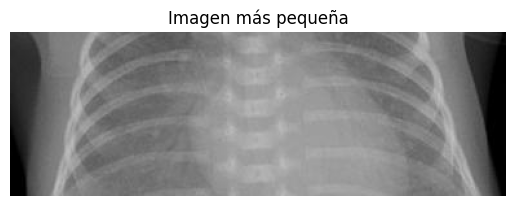

Imagen más grande:
  Archivo: /content/ProyectoTSFC/dataset\normal\NORMAL-9990348-0001.jpeg
  Dimensiones: 2916x2583
  Tamaño en píxeles: 7532028


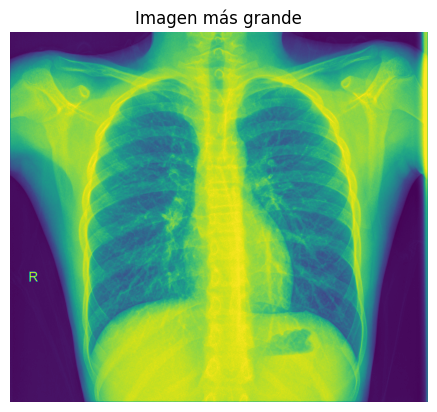

Imagen más cercana al promedio:
  Archivo: /content/ProyectoTSFC/dataset\neumonia\VIRUS-3923358-0002.jpeg
  Dimensiones: 1360x1048
  Tamaño en píxeles: 1425280


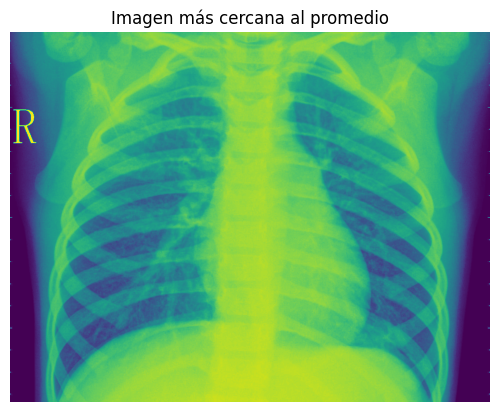

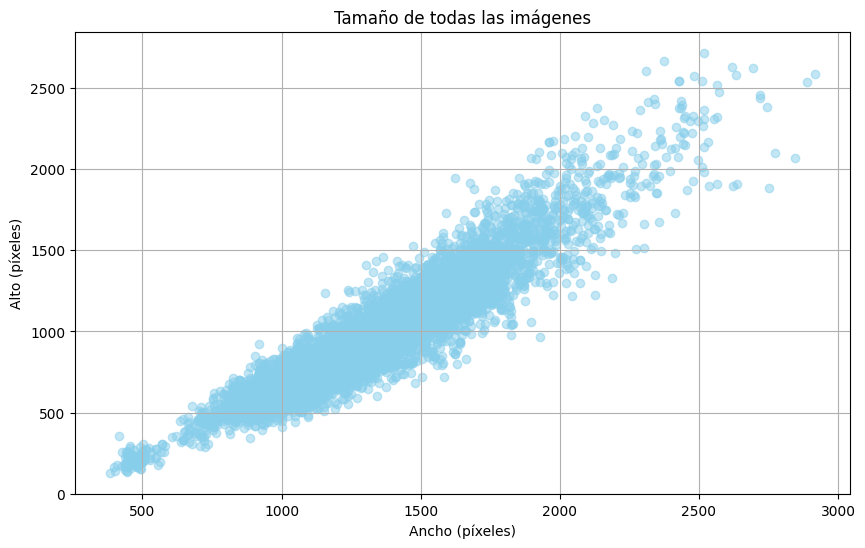

In [9]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Directorio base donde están las imágenes
base_dir = "/content/ProyectoTSFC/dataset"

# Creamos una lista donde almacenaremos las dimensiones de las imágenes junto con su ruta
image_info = []

# Iteramos por cada carpeta (neumonia y normal en este caso)
folders = ["neumonia", "normal"]
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        with Image.open(image_path) as img:
            width, height = img.size
            size_pixels = width * height  # Calculamos el tamaño en píxeles
            image_info.append({'file': image_path, 'width': width, 'height': height, 'size_pixels': size_pixels})

# Separar los anchos y altos para graficar (opcional, si quieres mantener la gráfica original)
widths = [info['width'] for info in image_info]
heights = [info['height'] for info in image_info]

# Identificar las imágenes de interés
smallest_image = min(image_info, key=lambda x: x['size_pixels'])
largest_image = max(image_info, key=lambda x: x['size_pixels'])
average_size = np.mean([info['size_pixels'] for info in image_info])
closest_to_average = min(image_info, key=lambda x: abs(x['size_pixels'] - average_size))

# Función para mostrar información e imágenes
def display_image_info(title, image_data):
    print(f"{title}:")
    print(f"  Archivo: {image_data['file']}")
    print(f"  Dimensiones: {image_data['width']}x{image_data['height']}")
    print(f"  Tamaño en píxeles: {image_data['size_pixels']}")
    # Mostrar la imagen
    with Image.open(image_data['file']) as img:
        plt.imshow(img)
        plt.axis('off')
        plt.title(title)
        plt.show()

# Mostrar las imágenes y sus datos
display_image_info("Imagen más pequeña", smallest_image)
display_image_info("Imagen más grande", largest_image)
display_image_info("Imagen más cercana al promedio", closest_to_average)

# Graficar los tamaños de las imágenes
plt.figure(figsize=(10, 6))
plt.scatter(widths, heights, color='skyblue', alpha=0.5)
plt.title('Tamaño de todas las imágenes')
plt.xlabel('Ancho (píxeles)')
plt.ylabel('Alto (píxeles)')
plt.grid(True)
plt.show()


Como pudimos darnos cuenta:
*   No todas las radiografias están completas.
*   No todas las radiografías estan en blanco y negro/ Escala de grises.

por lo que necesitaremos deshechar las imagenes más pequeñas rectangulares puesto que nos dimos cuenta que están recortando el área de interés.

Ahora bien, tomaremos las imagenes con dimensiones similares o más cercanas al promedio, y recortaremos las de mayores dimensiones para tenerlas estandarizadas.



In [10]:
import os
from PIL import Image

# Ruta base del dataset original
base_dir = "/content/ProyectoTSFC/dataset"

# Carpeta de salida para las imágenes procesadas
output_dir = "/content/ProyectoTSFC/Dataset_trabajado"
os.makedirs(output_dir, exist_ok=True)

# Carpetas que contienen las imágenes
folders = ["neumonia", "normal"]

# Dimensiones mínimas requeridas
min_width, min_height = 1000, 1000

# Función para recortar al centro
def crop_center(image, target_width, target_height):
    width, height = image.size
    left = (width - target_width) // 2
    top = (height - target_height) // 2
    right = left + target_width
    bottom = top + target_height
    return image.crop((left, top, right, bottom))

# Iterar por cada carpeta
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    output_folder = os.path.join(output_dir, folder)
    os.makedirs(output_folder, exist_ok=True)  # Crear la carpeta en la salida

    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        try:
            # Abrir la imagen
            with Image.open(image_path) as img:
                width, height = img.size
                if width < min_width or height < min_height:
                    # Imágenes que no cumplen los requisitos no se copian
                    print(f"Descartando: {image_path} (Dimensiones: {width}x{height})")
                else:
                    # Recortar al centro y redimensionar a 1000x1000 píxeles
                    cropped_img = crop_center(img, min_width, min_height)
                    output_path = os.path.join(output_folder, image_name)
                    cropped_img.save(output_path)  # Guardar la imagen recortada en la carpeta de salida
                    print(f"Procesada: {output_path} (Dimensiones originales: {width}x{height})")
        except Exception as e:
            # Manejo de errores para imágenes corruptas o problemas de lectura
            print(f"Error al procesar la imagen {image_path}: {e}")

print(f"Proceso completo. Las imágenes procesadas se guardaron en '{output_dir}'.")


Procesada: /content/ProyectoTSFC/Dataset_trabajado\neumonia\BACTERIA-1008087-0001.jpeg (Dimensiones originales: 1152x1032)
Descartando: /content/ProyectoTSFC/dataset\neumonia\BACTERIA-1025587-0001.jpeg (Dimensiones: 1096x808)
Descartando: /content/ProyectoTSFC/dataset\neumonia\BACTERIA-1027194-0001.jpeg (Dimensiones: 1056x696)
Descartando: /content/ProyectoTSFC/dataset\neumonia\BACTERIA-1033441-0001.jpeg (Dimensiones: 885x592)
Descartando: /content/ProyectoTSFC/dataset\neumonia\BACTERIA-103798-0001.jpeg (Dimensiones: 848x616)
Descartando: /content/ProyectoTSFC/dataset\neumonia\BACTERIA-103798-0002.jpeg (Dimensiones: 1010x676)
Procesada: /content/ProyectoTSFC/Dataset_trabajado\neumonia\BACTERIA-1039608-0001.jpeg (Dimensiones originales: 1528x1056)
Descartando: /content/ProyectoTSFC/dataset\neumonia\BACTERIA-1040986-0001.jpeg (Dimensiones: 1120x776)
Descartando: /content/ProyectoTSFC/dataset\neumonia\BACTERIA-1041881-0001.jpeg (Dimensiones: 1024x616)
Descartando: /content/ProyectoTSFC/da

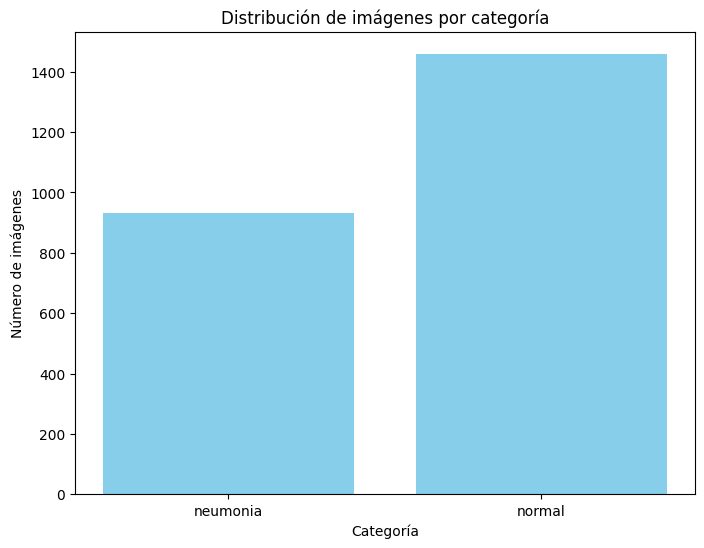

In [11]:
#directorio donde están las imágenes
base_dir = "/content/ProyectoTSFC/Dataset_trabajado"

#creamos una lista que nos permitirá ver la cantidad de imágenes por cada categoría
num_images_per_category = []

#Obtenemos la cantidad de impagenes que hay en cada una de las categorías, las cuales están como folders y vamos iterando para ver la cantidad por folder
folders = ["neumonia", "normal"]
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    num_images = len(os.listdir(folder_path))
    num_images_per_category.append(num_images)

#Etiquetas para las categorías, las cuales son las 4 que ya se mencionaron
labels = ["neumonia", "normal"]

#gráfica de distribución para ver la cantidad
plt.figure(figsize=(8, 6))
plt.bar(labels, num_images_per_category, color='skyblue')
plt.xlabel('Categoría')
plt.ylabel('Número de imágenes')
plt.title('Distribución de imágenes por categoría')
plt.show()

Como nos dimos cuenta, las radiografias de torax con neumonia eran las que presentaban más problemas de dimensión.

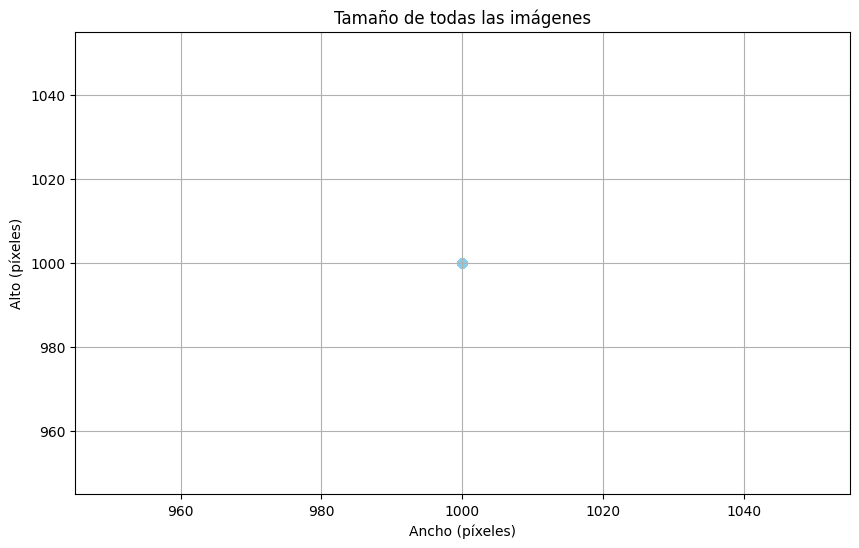

In [12]:
#COMPROBAREMOS EL TAMAÑO DE LAS IMÁGENES
from PIL import Image
import os

#Volvemos a cargar el directorio donde se encuentran las imágenes, está será la última vez que comentemos esto, de ahora en más cada que se use en el código
#ya no lo vamos a mencionar
base_dir = "/content/ProyectoTSFC/Dataset_trabajado"

#Creamos una lista donde se va a estar almacenando el tamaño de las imágenes, es decir, largo y ancho
image_sizes = []


#vamos a hacer primero una iteración en cada folder, de nuevo
folders = ["neumonia", "normal"]
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    #y ahora vamos a iterar en cada imagen de cada folder, obteniendo la dirección del folder y el nombre de la imágen, realmente el nombre no es muy útil
    #pero la función necesitaba dos parámetros y ps colocamos este para no tener problemas xd
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        #una vez que se tenga una imgaen, calculamos el largo y ancho y lo agregamos a la lista creada arriba
        with Image.open(image_path) as img:
            width, height = img.size
            image_sizes.append((width, height))

#Separar los tamaños de ancho y largo, la primera entrada es el ancho de la imagen y la segunda entrada el alto
widths = [size[0] for size in image_sizes]
heights = [size[1] for size in image_sizes]

#para poder ver si hay diferencias entre los tamaños, hacemos una gráfica que nos muestre todos los tamaños de todas las imágenes, pequeño spoiler de nuevo, todas son
#el mismo tamaño, es una muy buena base para empezar
plt.figure(figsize=(10, 6))
plt.scatter(widths, heights, color='skyblue', alpha=0.5)
plt.title('Tamaño de todas las imágenes')
plt.xlabel('Ancho (píxeles)')
plt.ylabel('Alto (píxeles)')
plt.grid(True)
plt.show()

Ya tenemos dimensionadas igual, todas nuestras imagenes

### Patrón de color en las imagenes

Como nos pudimos dar cuenta, tenemos las imagenes en rayos x multicolor y en escala de grises, la idea es que todas las radiografias estén es escala de grises


In [13]:
import os
from PIL import Image

# Ruta base del dataset original procesado
input_dir = "/content/ProyectoTSFC/Dataset_trabajado"

# Carpeta de salida para las imágenes en escala de grises
output_dir_gray = "/content/ProyectoTSFC/Dataset_trabajado_gris"
os.makedirs(output_dir_gray, exist_ok=True)

# Carpetas que contienen las imágenes
folders = ["neumonia", "normal"]

# Iterar por cada carpeta
for folder in folders:
    input_folder = os.path.join(input_dir, folder)
    output_folder = os.path.join(output_dir_gray, folder)
    os.makedirs(output_folder, exist_ok=True)  # Crear la carpeta de salida

    for image_name in os.listdir(input_folder):
        input_image_path = os.path.join(input_folder, image_name)
        output_image_path = os.path.join(output_folder, image_name)

        try:
            # Abrir la imagen
            with Image.open(input_image_path) as img:
                # Convertir la imagen a escala de grises
                gray_img = img.convert("L")
                # Guardar la imagen en la carpeta de salida
                gray_img.save(output_image_path)
                print(f"Convertida a escala de grises: {output_image_path}")
        except Exception as e:
            # Manejo de errores para imágenes corruptas o problemas de lectura
            print(f"Error al procesar la imagen {input_image_path}: {e}")

print(f"Proceso completo. Las imágenes en escala de grises se guardaron en '{output_dir_gray}'.")


Convertida a escala de grises: /content/ProyectoTSFC/Dataset_trabajado_gris\neumonia\BACTERIA-1008087-0001.jpeg
Convertida a escala de grises: /content/ProyectoTSFC/Dataset_trabajado_gris\neumonia\BACTERIA-1039608-0001.jpeg
Convertida a escala de grises: /content/ProyectoTSFC/Dataset_trabajado_gris\neumonia\BACTERIA-1065620-0001.jpeg
Convertida a escala de grises: /content/ProyectoTSFC/Dataset_trabajado_gris\neumonia\BACTERIA-1065620-0002.jpeg
Convertida a escala de grises: /content/ProyectoTSFC/Dataset_trabajado_gris\neumonia\BACTERIA-1069837-0002.jpeg
Convertida a escala de grises: /content/ProyectoTSFC/Dataset_trabajado_gris\neumonia\BACTERIA-1083680-0011.jpeg
Convertida a escala de grises: /content/ProyectoTSFC/Dataset_trabajado_gris\neumonia\BACTERIA-1129531-0001.jpeg
Convertida a escala de grises: /content/ProyectoTSFC/Dataset_trabajado_gris\neumonia\BACTERIA-1157929-0001.jpeg
Convertida a escala de grises: /content/ProyectoTSFC/Dataset_trabajado_gris\neumonia\BACTERIA-1176780-00

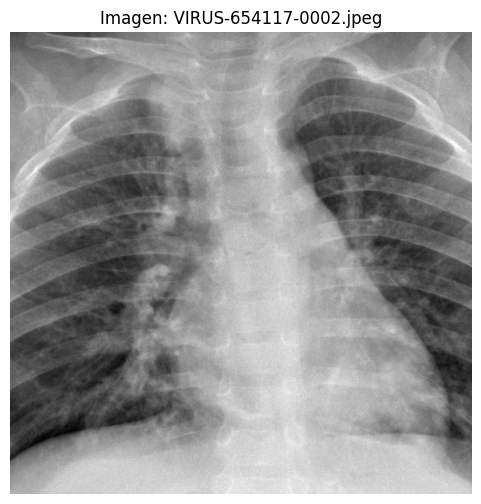

In [14]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Ruta base del dataset en escala de grises
base_dir_gray = "/content/ProyectoTSFC/Dataset_trabajado_gris"

# Seleccionar una carpeta e imagen específica (por ejemplo, la carpeta "neumonia")
folder = "neumonia"  # Cambia a "normal" si quieres probar con otra carpeta
folder_path = os.path.join(base_dir_gray, folder)

# Obtener una imagen de la carpeta
image_name = os.listdir(folder_path)[793]  # Seleccionar la imagen
image_path = os.path.join(folder_path, image_name)

# Abrir y mostrar la imagen
with Image.open(image_path) as img:
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap="gray")  # Mostrar en escala de grises
    plt.title(f"Imagen: {image_name}")
    plt.axis("off")
    plt.show()


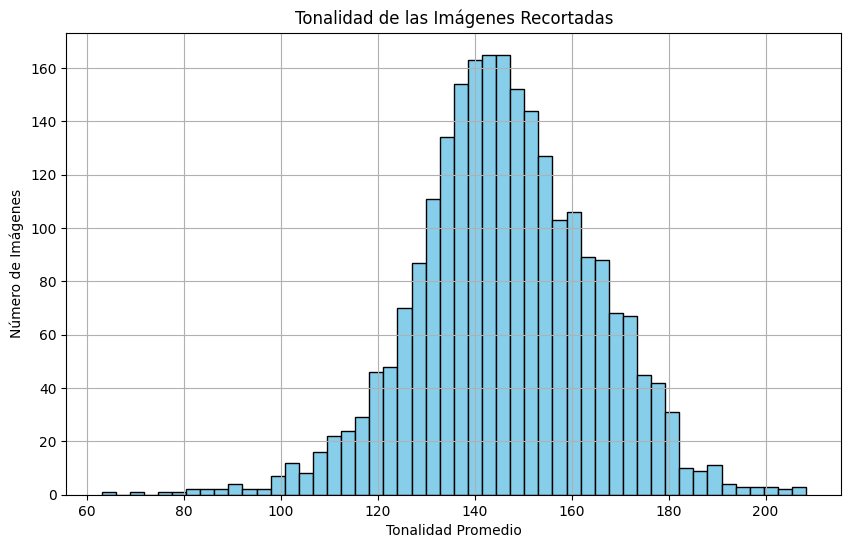

In [15]:
import os
import matplotlib.pyplot as plt
from PIL import Image

#esto no lo vamos a comentar, es donde están las imágenes recortadas
cropped_dir = "/content/ProyectoTSFC/Dataset_trabajado_gris"

#lista donde vamos a almacenar la tonalidad en escala de grises para cada imagen
average_brightness_values = []

#Iterar sobre las carpetas, de nuevo, no haremos mucho comentario
folders = ["neumonia", "normal"]
for folder in folders:
    folder_path = os.path.join(cropped_dir, folder)
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        #para cada una de las imágenes
        with Image.open(image_path) as img:
            #Convertir la imagen a escala de grises
            img_gray = img.convert('L')

            #Y ahora vamos a calcular la tonalidad promedio de los píxeles en escala de grises, para obtener el brillo
            brightness = img_gray.getdata()
            average_brightness = sum(brightness) / len(brightness)
            average_brightness_values.append(average_brightness)

#Grafica
plt.figure(figsize=(10, 6))
plt.hist(average_brightness_values, bins=50, color='skyblue', edgecolor='black')
plt.title('Tonalidad de las Imágenes Recortadas')
plt.xlabel('Tonalidad Promedio')
plt.ylabel('Número de Imágenes')
plt.grid(True)
plt.show()


Estandarizamos nuevamente el tamaño, pero ahora mas pequeño para poder usarlas en los modelos.

In [16]:
import os
from PIL import Image
import numpy as np

base_dir = "/content/ProyectoTSFC/Dataset_trabajado_gris"

folders = ["neumonia", "normal"]

target_size = (224, 224)

output_dir = "/content/ProyectoTSFC/DatosFinales"
os.makedirs(output_dir, exist_ok=True)

num_images_per_category = []

for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    output_folder_path = os.path.join(output_dir, folder)
    os.makedirs(output_folder_path, exist_ok=True)

    num_images = len(os.listdir(folder_path))
    num_images_per_category.append(num_images)

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            with Image.open(img_path) as img:
                img_resized = img.resize(target_size, Image.Resampling.LANCZOS)

                img_array = np.array(img_resized) / 224.0

                output_img_path = os.path.join(output_folder_path, img_name)
                img_resized.save(output_img_path)

        except Exception as e:
            print(f"Error procesando {img_path}: {e}")

# Print the number of images per category
for category, num_images in zip(folders, num_images_per_category):
    print(f"La categoria '{category}' tiene {num_images} imágenes.")

La categoria 'neumonia' tiene 931 imágenes.
La categoria 'normal' tiene 1458 imágenes.


# Elección del modelo

La idea original del proyecto fue usar una red neuronal convolusional (CNN). Pero como veremos a continuación no fue el 
mejor al momento de ver la matriz de confusión.

Por lo tanto tambien implementaremos un Random Forest y una Máquina de Soporte Vectorial (SVM), con los cuales se obtuvieron resultados mas satisfactorios.

### CNN

Implementaremos una red neuronal convolusional

In [ ]:
#librerias
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Primero crearemos el dataset con los datos manipulados. Una columna será una etiqueta que nos diga si es una imagen
de un pulmón enfermo o normal, y la otra columna será la ruta de la imagen.

In [18]:
# Ruta al dataset
dataset_path = "/content/ProyectoTSFC/DatosFinales"

# Crear listas para rutas y etiquetas
image_paths = []
labels = []

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(class_path, img_file))
                labels.append(class_name)

# Crear un DataFrame
data = pd.DataFrame({'image_path': image_paths, 'label': labels})

# Dividir en conjunto de entrenamiento y prueba
train, test = train_test_split(data, stratify=data['label'], test_size=0.2, random_state=42)


Con una función de Keras, cargaremos las imagenes y vemos que tienen dos categorias.

In [19]:
# Generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalización
    #rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Solo normalización

# Crear generadores
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),  # Reducir tamaño para mejorar velocidad
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 1911 validated image filenames belonging to 2 classes.
Found 478 validated image filenames belonging to 2 classes.


Se define el modelo convolucional con tres capas convolucionales 2D (con sus respectivos parametros), y una capa densa.

In [20]:
def build_model():
    model = models.Sequential()

    # Bloque 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    # Bloque 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Bloque 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    # Bloque 4 (Capa densa)
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))  # Regularización
    model.add(layers.Dense(1, activation='sigmoid'))  # Salida binaria

    return model


In [21]:
model = build_model()

#Compilación del modelo
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

#Vemos el resumen del modelo, para asegurarnos de que esté bien
model.summary()


c:\Users\zahid\Escritorio\TSFC\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Los callbacks son algunas funciones que tiene Keras, que nos permiten cambiar el comportamiento del modelo
mientras se esté ejecutando.

In [22]:
#Detiene el modelo si considera que ya no cambia la pérdida
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

#Cambia el ritmo de aprendizaje si considera que se ha estancado
plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1
)

#Crea checkpoints del mejor modelo
checkpoint = callbacks.ModelCheckpoint(
    filepath='best_model.keras', 
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)
#no supimos bien como funciona el checkpoint


Entrenamos el modelo con los datos de entrenamiento y validamos con los del test. Además ponemos nuestras épocas y los callbacks que definimos.

In [23]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping, plateau, checkpoint]
)


c:\Users\zahid\Escritorio\TSFC\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - binary_accuracy: 0.5674 - loss: 1.2357
Epoch 1: val_loss improved from inf to 0.63678, saving model to best_model.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 35s 561ms/step - binary_accuracy: 0.5679 - loss: 1.2291 - val_binary_accuracy: 0.6109 - val_loss: 0.6368 - learning_rate: 0.0010
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - binary_accuracy: 0.6108 - loss: 0.6367
Epoch 2: val_loss did not improve from 0.63678
60/60 ━━━━━━━━━━━━━━━━━━━━ 27s 452ms/step - binary_accuracy: 0.6108 - loss: 0.6368 - val_binary_accuracy: 0.6109 - val_loss: 0.6372 - learning_rate: 0.0010
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - binary_accuracy: 0.6275 - loss: 0.6219
Epoch 3: val_loss improved from 0.63678 to 0.59321, saving model to best_model.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 27s 452ms/step - binary_accuracy: 0.6282 - loss: 0.6217 - val_binary_accuracy: 0.6925 - val_loss: 0.5932 - learning_rate: 0.0010
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s

Evaluamos el modelo:

In [72]:
#Evaluación del modelo
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Precisión: {test_accuracy * 100:.2f}%")


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - binary_accuracy: 0.8558 - loss: 0.3709
Precisión: 87.66%


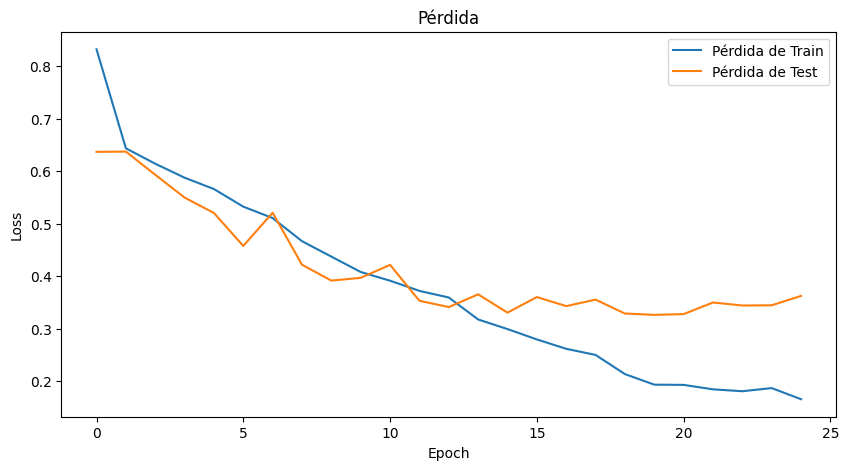

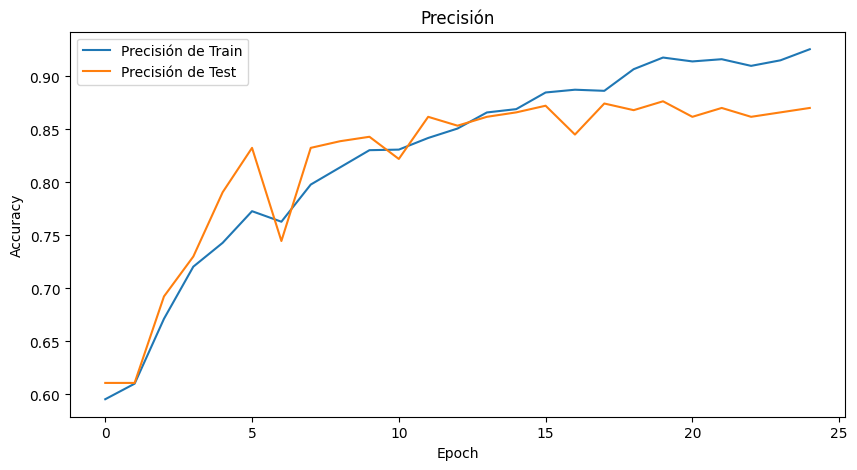

In [73]:
#Ploteamos los datos de Precisión y la Pérdida del modelo
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Pérdida de Train')
plt.plot(history.history['val_loss'], label='Pérdida de Test')
plt.title('Pérdida')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['binary_accuracy'], label='Precisión de Train')
plt.plot(history.history['val_binary_accuracy'], label='Precisión de Test')
plt.title('Precisión')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [74]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtenemos las etiquetas reales
y_test = test_generator.classes

# Generamos las predicciones (probabilidades)
y_pred_prob = model.predict(test_generator)

# Convertimos las probabilidades en clases binarias
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step


Precisión: 0.5376569037656904
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.41      0.42      0.42       186
           1       0.62      0.61      0.62       292

    accuracy                           0.54       478
   macro avg       0.52      0.52      0.52       478
weighted avg       0.54      0.54      0.54       478



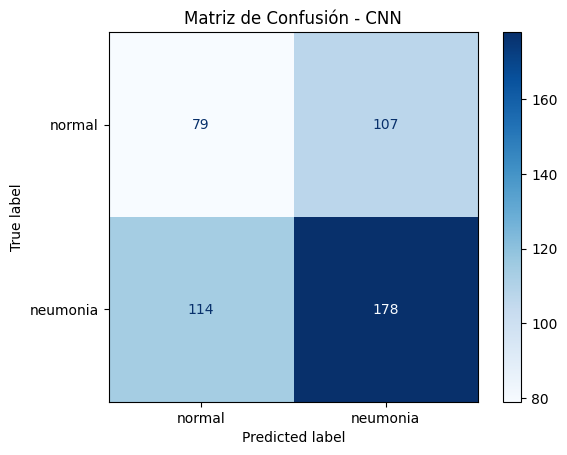

In [75]:
# Creamos una matriz de confusión
cm = confusion_matrix(y_test, y_pred)

#Evaluamos el modelo
print("Precisión:", accuracy_score(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

#Ploteamos
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['normal', 'neumonia'], cmap='Blues')

#plot
plt.title("Matriz de Confusión - CNN")
plt.show()

### SVM

El SVM es bastante mas simple de ver, y a continuación se implementa.

Procesaremos de nuevo las imagenes, para guardar poder computacional, se utilizaran las imagenes obtenidas en gris con un tamaño mas pequeño de 128x128.

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [53]:
base_dir = "/content/ProyectoTSFC/Dataset_trabajado_gris"
categories = ["neumonia", "normal"]

target_size = (128, 128)  #Tamaño de la imagen

data = []
labels = []

for label, category in enumerate(categories):
    folder_path = os.path.join(base_dir, category)
    
    if not os.path.exists(folder_path):
        print(f"Folder not found: {folder_path}")
        continue

    print(f"Processing folder: {folder_path}")
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            #Encontrar la imagen
            with Image.open(img_path) as img:
                #Convertirla en RGB
                img = img.convert('RGB')
                
                #Redimensionar la imagen con LANCZOS
                img_resized = img.resize(target_size, Image.Resampling.LANCZOS)
                
                #Normalización
                img_array = np.array(img_resized).flatten() / 255.0
                
                data.append(img_array)
                labels.append(label)
        except Exception as e:
            print(f"Error al procesar {img_path}: {e}")

Processing folder: /content/ProyectoTSFC/Dataset_trabajado_gris\neumonia
Processing folder: /content/ProyectoTSFC/Dataset_trabajado_gris\normal


In [54]:
#Vemos si los datos están correctos
data = np.array(data)
labels = np.array(labels)

if data.shape[0] == 0:
    raise ValueError("No hay imagenes en el dataset.")

print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")

Data shape: (2389, 49152)
Labels shape: (2389,)


In [55]:
#Volvemos a hacer el split del dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [70]:
#Encontramos un modelo prehecho, pero no preentrenado
svm_model = SVC(kernel='rbf', C=3.0, random_state=89)
svm_model.fit(X_train, y_train)

SVC(C=3.0, random_state=89)

In [71]:
#Prediciones, nuevamente para evaluar el modelo
y_pred = svm_model.predict(X_test)

#Evaluamos el modelo
print("Precisión:", accuracy_score(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Precisión: 0.8828451882845189
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       146
           1       0.84      0.86      0.85        93

    accuracy                           0.88       239
   macro avg       0.88      0.88      0.88       239
weighted avg       0.88      0.88      0.88       239



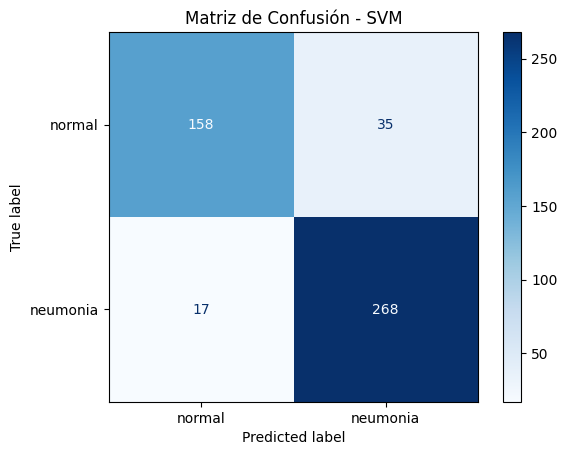

In [ ]:
#De nuevo una matriz de confusion
cm = confusion_matrix(y_test, y_pred)

#Ploteamos
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['normal', 'neumonia'], cmap='Blues')

#plot
plt.title("Matriz de Confusión - SVM")
plt.show()

### RandomForest

El ultimo modelo es un RandomForest, que de igual manera es mas simple que una CNN, y con buenos resultados

In [81]:
from skimage.io import imread
from skimage.transform import resize
from sklearn.ensemble import RandomForestClassifier


Se vuelven a redimensionar las imagenes, pues siempre vamos desde nuestras imagenes

In [82]:
# Variables para guardar imágenes y etiquetas
data = []
labels = []


target_size = (224, 224)#Redimensionamos

# Cargamos las imágenes y etiquetas
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(class_path, img_file)
                img = imread(img_path)
                img_resized = resize(img, target_size, anti_aliasing=True)
                data.append(img_resized.flatten())  # Convertimos la imagen en un vector
                labels.append(1 if class_name == 'neumonia' else 0)

In [83]:
#Checamos los datos
X = np.array(data)
y = np.array(labels)

# Se divide los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

print(f"Tamaño de los datos de entrenamiento: {X_train.shape}")
print(f"Tamaño de los datos de prueba: {X_test.shape}")

Tamaño de los datos de entrenamiento: (2150, 50176)
Tamaño de los datos de prueba: (239, 50176)


Se define el modelo de RandomForest.

In [84]:
#Modelo de RandomForest y se cambian los parametros
random_forest = RandomForestClassifier(
    n_estimators=150,  #Número de árboles
    max_depth=10,      #Profundidad de los arboles
    random_state=123,
    n_jobs=-1
)

In [85]:
#Se entrena el modelo
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=150, n_jobs=-1,
                       random_state=123)

Evaluamos el modelo

In [89]:
# Predicciones
y_pred = random_forest.predict(X_test)

print("Precisión:", accuracy_score(y_test, y_pred))


# Evaluación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['normal', 'neumonia']))

Precisión: 0.8661087866108786
Reporte de Clasificación:
              precision    recall  f1-score   support

      normal       0.88      0.91      0.89       146
    neumonia       0.85      0.80      0.82        93

    accuracy                           0.87       239
   macro avg       0.86      0.85      0.86       239
weighted avg       0.87      0.87      0.87       239



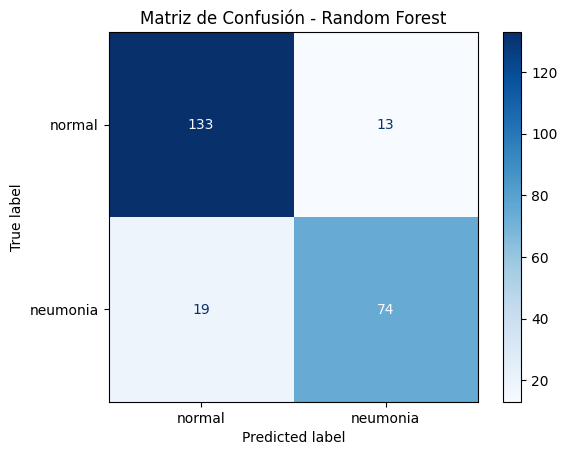

In [88]:
#Mi mejor amiga, la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['normal', 'neumonia'], cmap='Blues')

#plot
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# Conclusiones


El objetivo principal era utilizar una red convolusional para atacar el problema, pero como puede verse no es la mejor opción por como se comporta. El CNN muestra tener una alta precisión
y una pérdida relativamente alta, pero, lo que mas afecta es como se ve la matriz de confusión que muestra como se equivoca mucho al intentar identificar la neumonia en los pacientes. Se 
muestra una precisión real de aproximadamente el 50%. Otro problema grande que presenta una red convolucional es el poder computacional que requiere, y por ende el tiempo que tarda en ejecutarse.

El SVM nos proporciona mejores resultados todo esto con imagenes mas pequeñas que llegan a acortar el tiempo y poder necesario para realizar un mejor trabajo. Se nos presenta una precision muy alta
rondando el 90%.

Finalmente el RandomForest de igual manera nos arroja mejores resultados, y con incluso menor poder necesario, haciendo la misma tarea en cuestión de segundos. Tuvo una precisión igualmente alta, llegando a
aproximadamente el 85%.

El proyecto fue una cuestión de experimentación tanto de modelos, asi como de parametros en los mismos que nos ayudaran a exprimir toda mejora que se pudiera.

Como modelo, el mejor fue el SVM por la precisión que llegó a tener. Pero para aplicaciones reales y con ciertas limitantes el RandomForest fue la mejor opción en cuanto a velocidad y resultados.

# Fuentes



*   https://www.gob.mx/salud/en/articulos/neumonia-es-un-tipo-de-infeccion-respiratoria-aguda-grave-que-afecta-a-los-pulmones
*   https://www.gob.mx/salud/conadic/articulos/12-de-noviembre-dia-mundial-contra-la-neumonia-importancia-del-tabaquismo-en-el-desarrollo-de-esta-enfermedad?idiom=es
*   https://www.nationalgeographic.es/ciencia/neumonia-tipos-diferencias
*   https://www.mayoclinic.org/es/diseases-conditions/pneumonia/symptoms-causes/syc-20354204
*   https://www.clinicbarcelona.org/asistencia/enfermedades/neumonia/causas-y-factores-de-riesgo
*   https://www.larazon.es/lr-content/20221112/yegju7je55aarjs2r7bw2gce54.html
*   https://www.andessalud.cl/2024/11/quienes-son-mas-propensos-a-tener-neumonia/
*   https://www.clinicbarcelona.org/asistencia/enfermedades/neumonia/causas-y-factores-de-riesgo










